In [33]:
from torchvision import models
import torch
from explanable.common.utilize import readImageAndPreprocessing
from explanable.explainmethods.CamExpl import CamExplClass
from explanable.visualization import visual
from explanable.metrics.Infidelity import InfidelityClass

%load_ext autoreload
%autoreload 2

PATH_TO_IMAGE = "../image/deer.png"
# PATH_TO_IMAGE = '../image/cat.jpg'
inputs = readImageAndPreprocessing(PATH_TO_IMAGE)
print(inputs.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1, 3, 224, 224)


In [34]:
model = models.resnet50()
model.load_state_dict(torch.load('../pretrainingmodel/resnet50-0676ba61.pth'))
model.eval()
print()

In [35]:
# cam = CamExplClass(model)
# cam.explain(inputs)

In [36]:
infidelity = InfidelityClass(model)
# infidelity.setExplanation(cam)
# infid = infidelity.evaluate(inputs)
# print(infid)

In [37]:
from explanable.explainmethods.GradCamExpl import GradCamExplClass

grc = GradCamExplClass(model)
grc.explain(inputs)

In [38]:
infidelity.setExplanation(grc)
infid = infidelity.evaluate(inputs)
print(infid)

0.05496569874057169


In [39]:
from explanable.explainmethods.SmoothGradExpl import SmoothGradExplClass

smg = SmoothGradExplClass(model)
smg.explain(20, 0.1, inputs)

100%|██████████| 20/20 [00:02<00:00,  7.52it/s]


In [40]:
infidelity.setExplanation(smg)
infid = infidelity.evaluate(inputs)
print(infid)

0.057250655731246575


AttributeError: 'list' object has no attribute 'values'

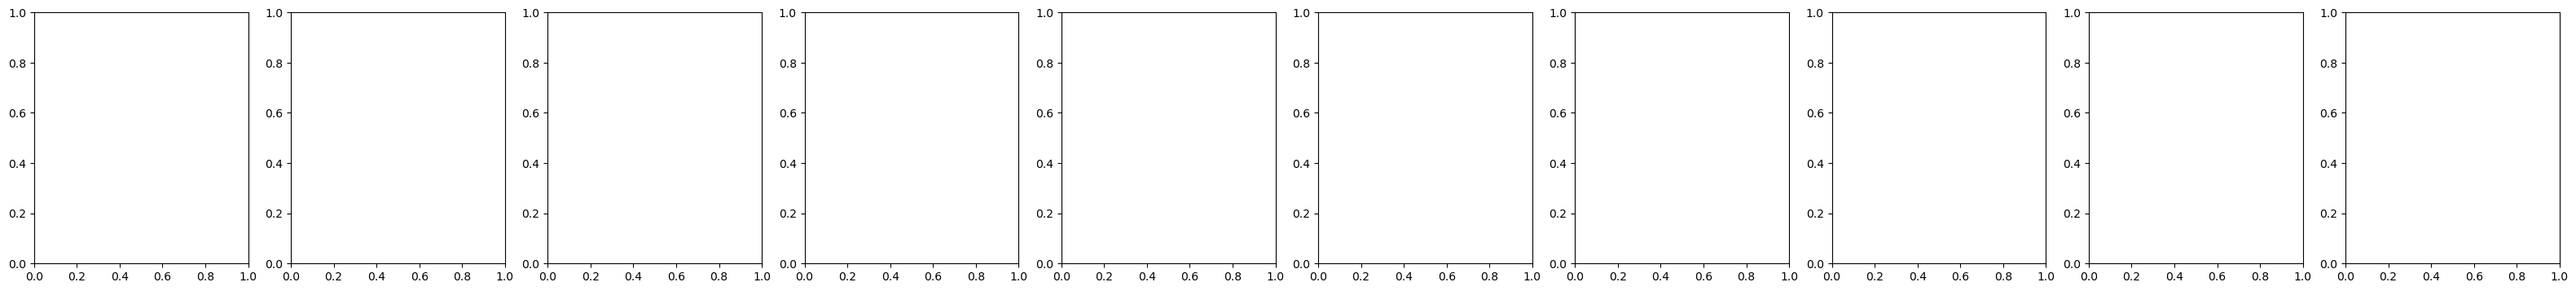

In [41]:
from explanable.visualization.visual import showByPictures

showByPictures(infidelity.generatedSamples)